# IRF
Compare three kinds of instrument response function (cauchy, gaussian, pseudo voigt)

In [1]:
# import needed module
import numpy as np
import matplotlib.pyplot as plt
import TRXASprefitpack
from TRXASprefitpack import gau_irf, cauchy_irf, pvoigt_irf
from TRXASprefitpack import model_n_comp_conv
plt.rcParams["figure.figsize"] = (14,10)

## version infromation

In [2]:
print(TRXASprefitpack.__version__)

0.5.0


## Define function for IRF
for pseudo voigt profile eta is chosen according to
 [J. Appl. Cryst. (2000). **33**, 1311-1316](https://doi.org/10.1107/S0021889800010219)

In [3]:
def calc_eta(fwhm):
    f = fwhm[0]**5+2.69269*fwhm[0]**4*fwhm[1]+2.42843*fwhm[0]**3*fwhm[1]**2 + \
                    4.47163*fwhm[0]**2*fwhm[1]**3 + 0.07842*fwhm[0]*fwhm[1]**4 + fwhm[1]**5
    f = f**(1/5)
    eta = 1.36603*(fwhm[1]/f)-0.47719*(fwhm[1]/f)**2+0.11116*(fwhm[1]/f)**3
    return eta

In [4]:
help(gau_irf)

Help on function gau_irf in module TRXASprefitpack.mathfun.irf:

gau_irf(t: Union[float, numpy.ndarray], fwhm: float) -> Union[float, numpy.ndarray]
    Compute gaussian shape irf function
    
    Args:
      t: time
      fwhm: full width at half maximum of gaussian distribution
    
    Returns:
     normalized gaussian function.



In [5]:
help(cauchy_irf)

Help on function cauchy_irf in module TRXASprefitpack.mathfun.irf:

cauchy_irf(t: Union[float, numpy.ndarray], fwhm: float) -> Union[float, numpy.ndarray]
    Compute lorenzian shape irf function
    
    Args:
      t: time
      fwhm: full width at half maximum of cauchy distribution
    
    Returns:
     normalized lorenzian function.



In [6]:
help(pvoigt_irf)

Help on function pvoigt_irf in module TRXASprefitpack.mathfun.irf:

pvoigt_irf(t: Union[float, numpy.ndarray], fwhm_G: float, fwhm_L: float, eta: float) -> Union[float, numpy.ndarray]
    Compute pseudo voight shape irf function
    (i.e. linear combination of gaussian and lorenzian function)
    
    Args:
      t: time
      fwhm_G: full width at half maximum of gaussian part
      fwhm_L: full width at half maximum of lorenzian part
      eta: mixing parameter
    Returns:
     linear combination of gaussian and lorenzian function with mixing parameter eta.



In [7]:
# get basic information of model_n_comp_conv
help(model_n_comp_conv)

Help on function model_n_comp_conv in module TRXASprefitpack.mathfun.exp_decay_fit:

model_n_comp_conv(t: numpy.ndarray, fwhm: Union[float, numpy.ndarray], tau: numpy.ndarray, c: numpy.ndarray, base: Union[bool, NoneType] = True, irf: Union[str, NoneType] = 'g', eta: Union[float, NoneType] = None) -> numpy.ndarray
    Constructs the model for the convolution of n exponential and
    instrumental response function
    Supported instrumental response function are
    
      * g: gaussian distribution
      * c: cauchy distribution
      * pv: pseudo voigt profile
    
    Args:
       t: time
       fwhm: full width at half maximum of instrumental response function
       tau: life time for each component
       c: coefficient for each component
       base: whether or not include baseline [default: True]
       irf: shape of instrumental
            response function [default: g]
    
              * 'g': normalized gaussian distribution,
              * 'c': normalized cauchy distribut

## Compare cauchy and gaussian IRF with same fwhm

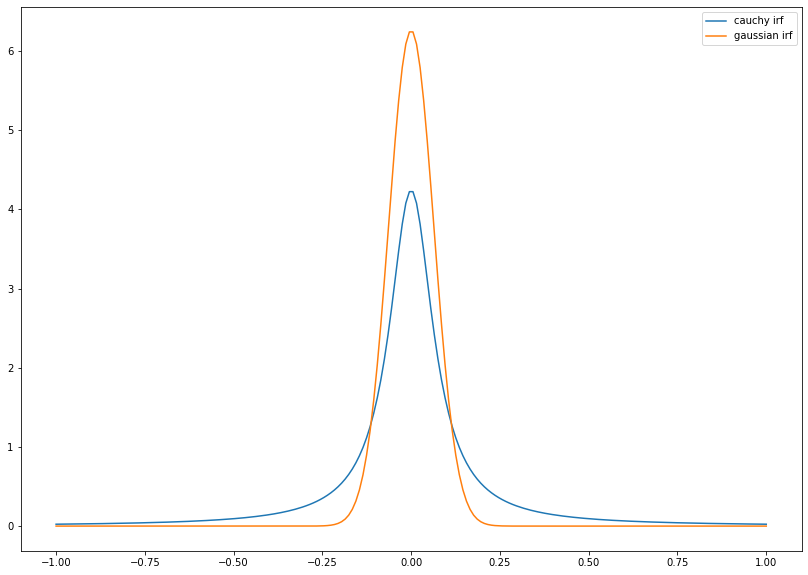

In [8]:
fwhm = 0.15 # 150 fs
t = np.linspace(-1,1,200)
cauchy = cauchy_irf(t,fwhm)
gau = gau_irf(t,fwhm)
plt.plot(t, cauchy, label='cauchy irf')
plt.plot(t, gau, label='gaussian irf')
plt.legend()
plt.show()

Cauchy irf is more diffuse then Gaussian irf

## Compare pseudo voigt irf with different combination of (fwhm_G, fwhm_L)
1. (0.25, 0.1)
2. (0.15, 0.3)
3. (0.1, 0.5)

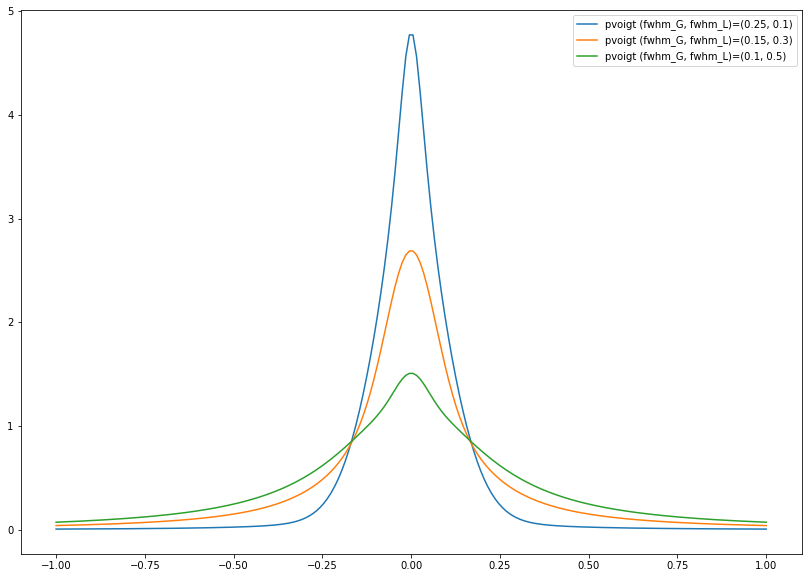

In [9]:
fwhm_1 = [0.25, 0.1]
fwhm_2 = [0.15, 0.3]
fwhm_3 = [0.1, 0.5]
eta_1 = calc_eta(fwhm_1)
eta_2 = calc_eta(fwhm_2)
eta_3 = calc_eta(fwhm_3)
pvoigt1 = pvoigt_irf(t, fwhm_1[0], fwhm_1[1], eta_1)
pvoigt2 = pvoigt_irf(t, fwhm_2[0], fwhm_2[1], eta_2)
pvoigt3 = pvoigt_irf(t, fwhm_3[0], fwhm_3[1], eta_3)
plt.plot(t, pvoigt1, label=f'pvoigt (fwhm_G, fwhm_L)=({fwhm_1[0]}, {fwhm_1[1]})')
plt.plot(t, pvoigt2, label=f'pvoigt (fwhm_G, fwhm_L)=({fwhm_2[0]}, {fwhm_2[1]})')
plt.plot(t, pvoigt3, label=f'pvoigt (fwhm_G, fwhm_L)=({fwhm_3[0]}, {fwhm_3[1]})')
plt.legend()
plt.show()

## Compare baseline signal (IRF: cauchy, gaussian with same fwhm=0.15)

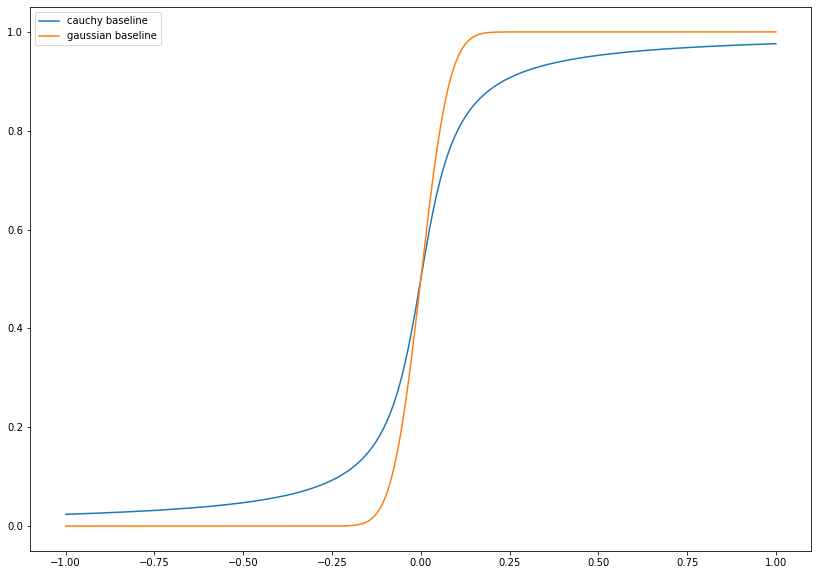

In [10]:
fwhm = np.array([0.15])
tau = np.zeros(0)
c = np.ones(1)
cauchy_baseline = model_n_comp_conv(t, fwhm, tau, c, base=True, irf='c')
gauss_baseline = model_n_comp_conv(t, fwhm, tau, c, base=True, irf='g')
plt.plot(t, cauchy_baseline, label='cauchy baseline')
plt.plot(t, gauss_baseline, label='gaussian baseline')
plt.legend()
plt.show()

gaussian baseline is sharper than cauchy baseline

## Compare pseudo voigt irf baseline signal with different combination of (fwhm_G, fwhm_L)
1. (0.25, 0.1)
2. (0.15, 0.3)
3. (0.1, 0.5)

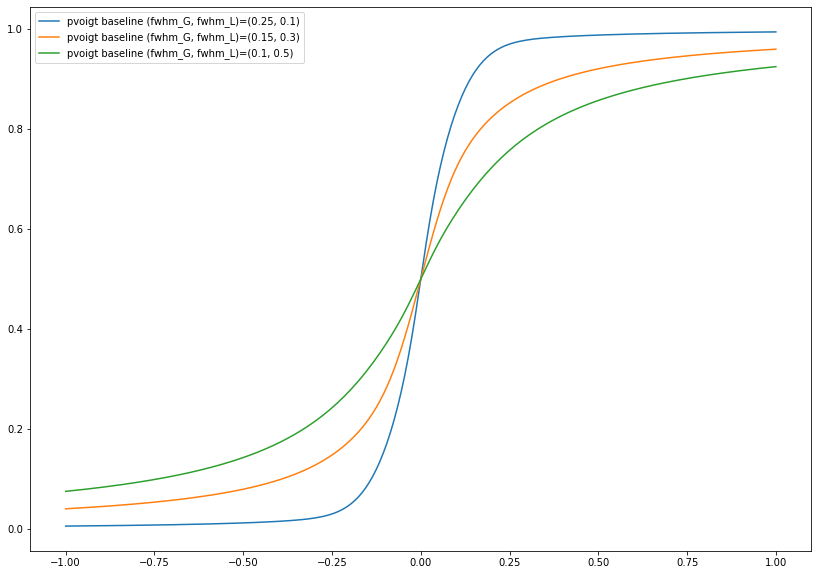

In [11]:
fwhm_1 = [0.25, 0.1]
fwhm_2 = [0.15, 0.3]
fwhm_3 = [0.1, 0.5]
tau = np.zeros(0)
c = np.ones(1)
pv1_baseline = model_n_comp_conv(t, fwhm_1, tau, c, base=True, irf='pv')
pv2_baseline = model_n_comp_conv(t, fwhm_2, tau, c, base=True, irf='pv')
pv3_baseline = model_n_comp_conv(t, fwhm_3, tau, c, base=True, irf='pv')
plt.plot(t, pv1_baseline, label=f'pvoigt baseline (fwhm_G, fwhm_L)=({fwhm_1[0]}, {fwhm_1[1]})')
plt.plot(t, pv2_baseline, label=f'pvoigt baseline (fwhm_G, fwhm_L)=({fwhm_2[0]}, {fwhm_2[1]})')
plt.plot(t, pv3_baseline, label=f'pvoigt baseline (fwhm_G, fwhm_L)=({fwhm_3[0]}, {fwhm_3[1]})')
plt.legend()
plt.show()

As lorenzian (cauchy) character smaller, sharper the baseline.

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=fwhm/2)

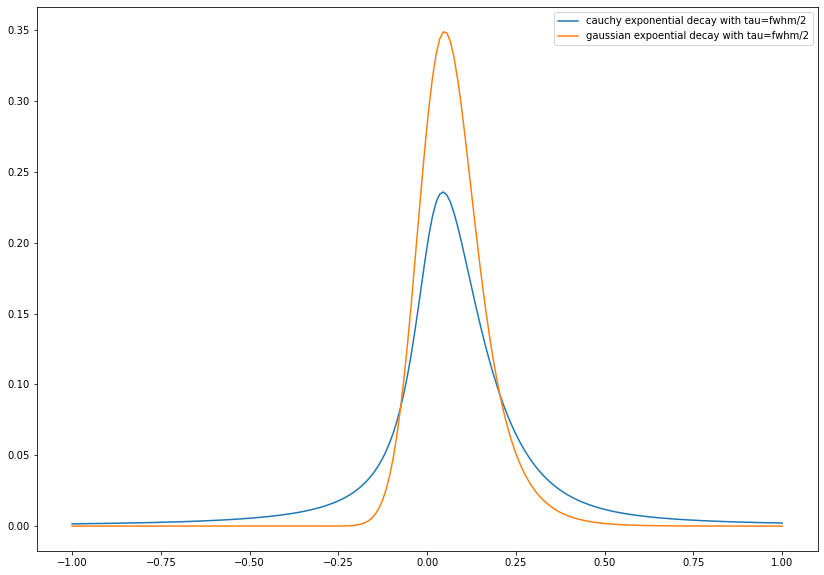

In [12]:
fwhm = np.array([0.15])
tau = np.array([fwhm[0]/2])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=fwhm/2')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=fwhm/2')
plt.legend()
plt.show()

if tau: time constant is less than irf, we can only see little portion of exponetial decay feature. 

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=fwhm)

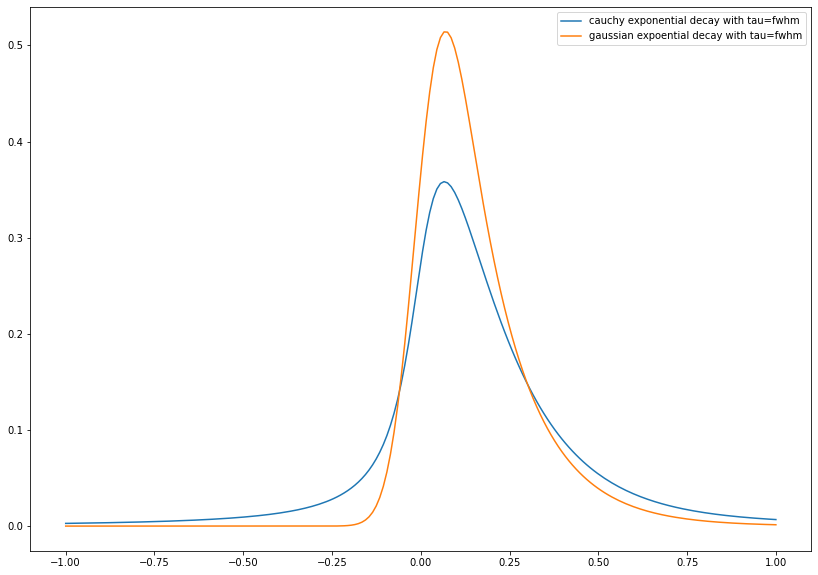

In [13]:
fwhm = np.array([0.15])
tau = np.array([fwhm[0]])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=fwhm')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=fwhm')
plt.legend()
plt.show()

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=2fwhm)

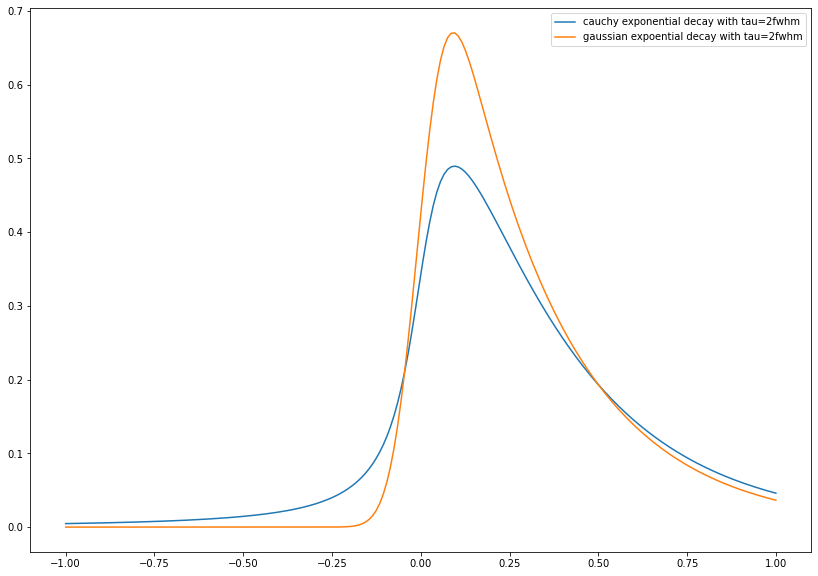

In [14]:
fwhm = np.array([0.15])
tau = np.array([2*fwhm[0]])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=2fwhm')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=2fwhm')
plt.legend()
plt.show()

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=10fwhm)

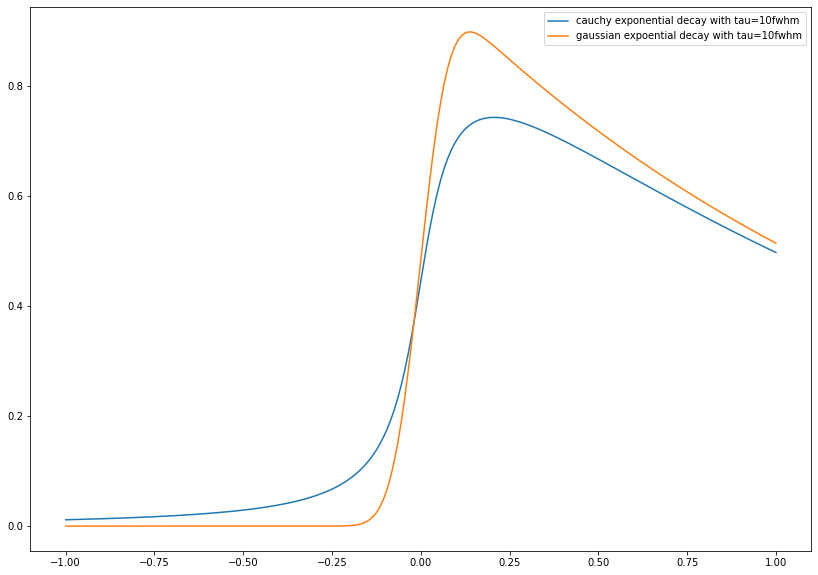

In [15]:
fwhm = np.array([0.15])
tau = np.array([10*fwhm[0]])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=10fwhm')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=10fwhm')
plt.legend()
plt.show()

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=0.1fwhm)

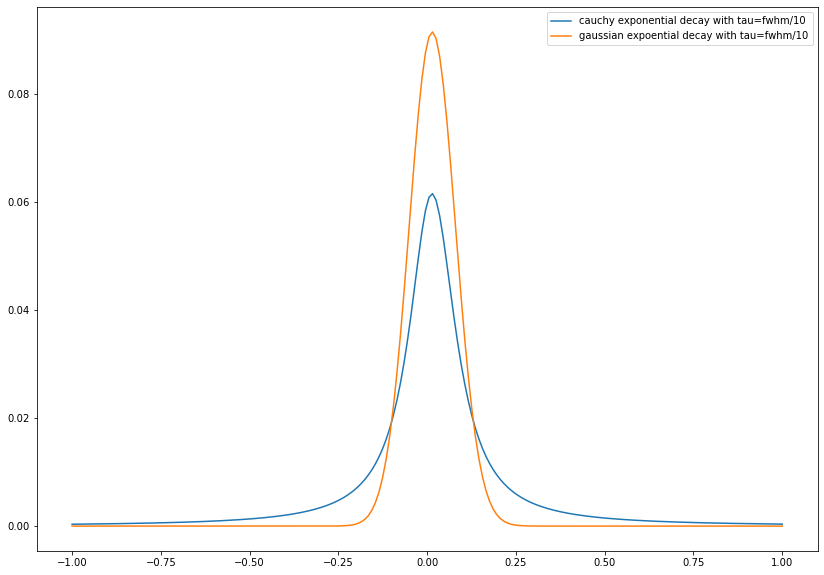

In [16]:
fwhm = np.array([0.15])
tau = np.array([0.1*fwhm[0]])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=fwhm/10')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=fwhm/10')
plt.legend()
plt.show()

signal is very small and we can only see irf feature.

## 3rd generation x-ray source with fs dynamics

* fwhm = 80 ps
* tau1 = 300 fs
* tau2 = 3 ps
* tau3 = 30 ps

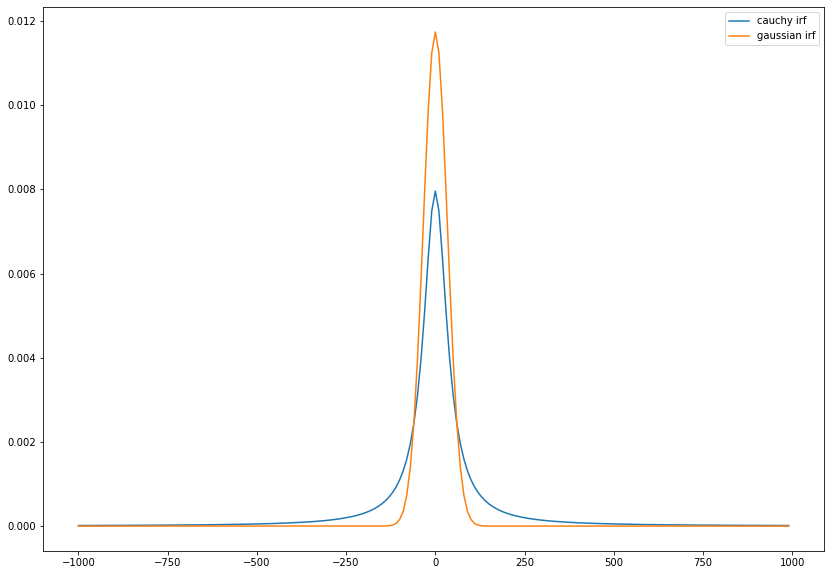

In [17]:
fwhm = 80 # 80 ps
t = np.arange(-1000, 1000, 10)
cauchy = cauchy_irf(t,fwhm)
gau = gau_irf(t,fwhm)
plt.plot(t, cauchy, label='cauchy irf')
plt.plot(t, gau, label='gaussian irf')
plt.legend()
plt.show()

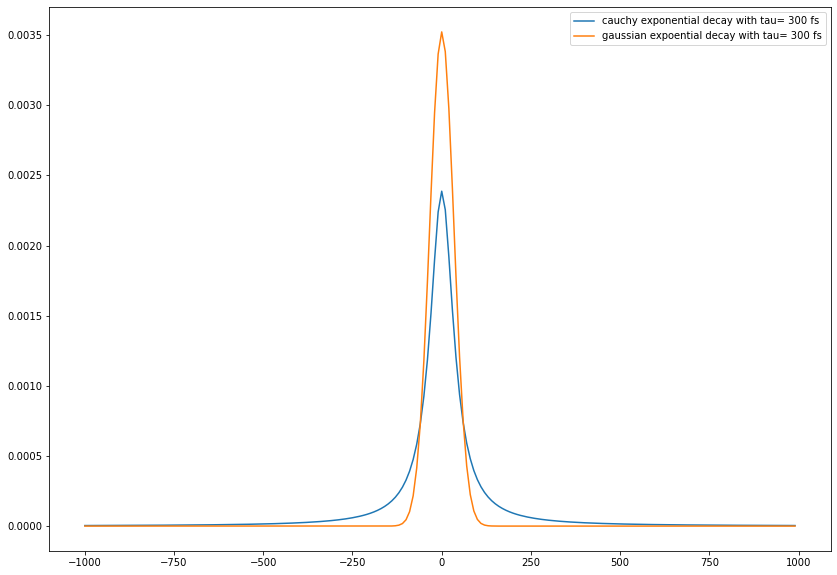

In [18]:
fwhm = np.array([fwhm])
tau = np.array([0.3])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau= 300 fs')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau= 300 fs')
plt.legend()
plt.show()

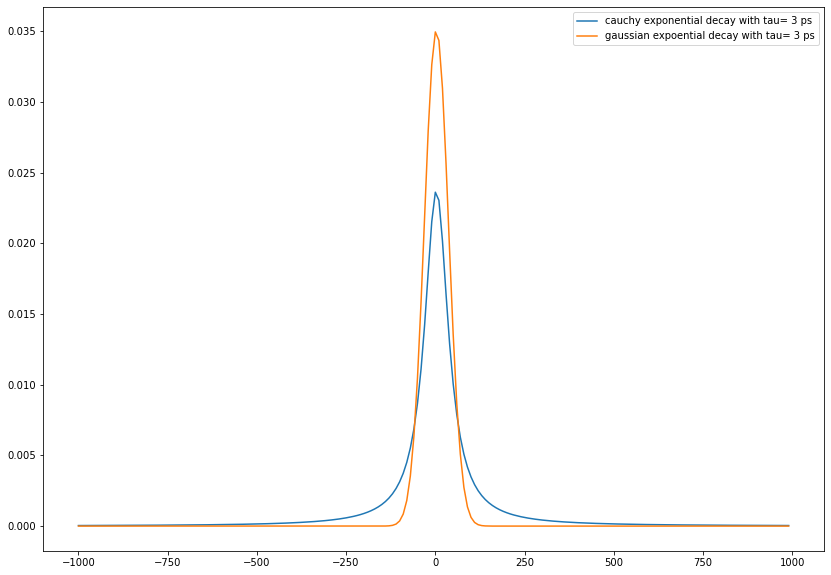

In [19]:
tau = np.array([3])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau= 3 ps')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau= 3 ps')
plt.legend()
plt.show()

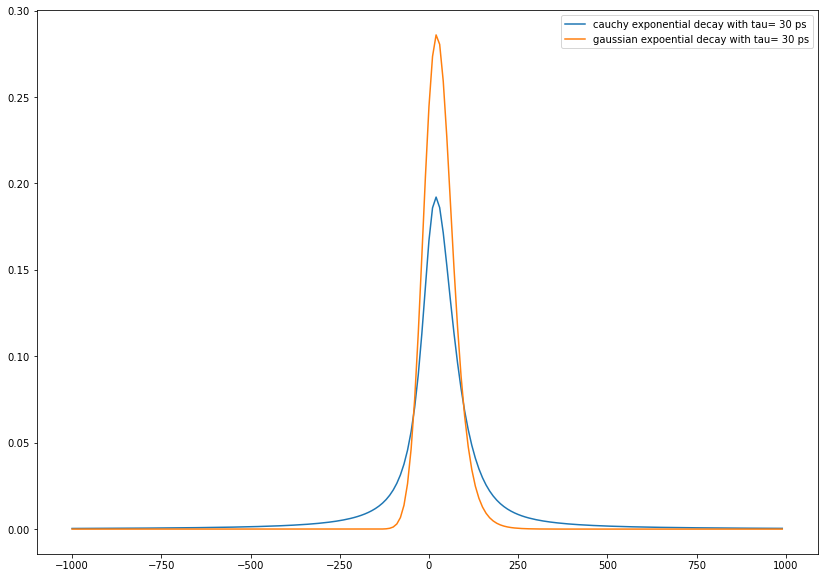

In [20]:
tau = np.array([30])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau= 30 ps')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau= 30 ps')
plt.legend()
plt.show()

## Conclusion
3rd gen X-ray source with 80 ps fwhm could not see fs dynamics. 